# Задание 02

![](got.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import pandas as pd

Будем изучать важность персонажей в книгах "A Song of Ice and Fire" (G.R.R. Martin). Два героя связаны ребром, если их имена появляются в тексте на расстоянии не более 15 слов в соответствующей книге. [Данные](https://github.com/mathbeveridge/asoiaf) находятся в открытом доступе для 5 книг.
Сеть -- взвешенная, вес ребра определяется числом взаимодействий (упоминаний в тексте).

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving asoiaf-book1-edges.csv to asoiaf-book1-edges (1).csv
Saving asoiaf-book2-edges.csv to asoiaf-book2-edges (1).csv
Saving asoiaf-book3-edges.csv to asoiaf-book3-edges (1).csv
Saving asoiaf-book4-edges.csv to asoiaf-book4-edges (1).csv
Saving asoiaf-book5-edges.csv to asoiaf-book5-edges (1).csv
User uploaded file "asoiaf-book1-edges.csv" with length 27658 bytes
User uploaded file "asoiaf-book2-edges.csv" with length 31768 bytes
User uploaded file "asoiaf-book3-edges.csv" with length 41174 bytes
User uploaded file "asoiaf-book4-edges.csv" with length 28973 bytes
User uploaded file "asoiaf-book5-edges.csv" with length 31515 bytes


In [3]:
book1 = pd.read_csv('asoiaf-book1-edges.csv')
book2 = pd.read_csv('asoiaf-book2-edges.csv')
book3 = pd.read_csv('asoiaf-book3-edges.csv')
book4 = pd.read_csv('asoiaf-book4-edges.csv')
book5 = pd.read_csv('asoiaf-book5-edges.csv')

In [4]:
book1

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


#### Постройте сеть персонажей по первой книге. 

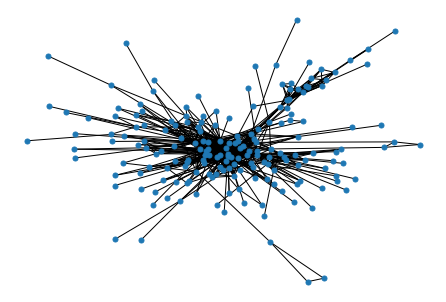

In [5]:
G1=nx.from_pandas_edgelist(book1,'Source', 'Target', edge_attr=True, create_using=nx.Graph())
pos=nx.spring_layout(G1,iterations=20)
nx.draw(G1,pos,node_size=25,with_labels=False)

In [6]:
print(list(G1.edges(data=True))[15]) # ребро в сети

('Jaime-Lannister', 'Kevan-Lannister', {'Type': 'Undirected', 'weight': 4, 'book': 1})


**1.  Определите топ-10 персонажей по значению центральности по степени. Сколько среди них Старков? (1 балл)**

In [7]:
import operator

central_dict = nx.degree_centrality(G1)
central = sorted(central_dict.items(), key=operator.itemgetter(1),reverse=True)
central_all_names = [central[i][0] for i in range(0,10)]

name = 'Stark'
res = [i for i in range(len(central_all_names)) if name in central_all_names[i]]
central_names = [central_all_names[i] for i in res]

print('топ-10 персонажей по значению центральности по степени:\n', ',\n '.join(central_all_names))
print('\n')
print('Среди них', len(central_names),'Старков')

топ-10 персонажей по значению центральности по степени:
 Eddard-Stark,
 Robert-Baratheon,
 Tyrion-Lannister,
 Catelyn-Stark,
 Jon-Snow,
 Robb-Stark,
 Sansa-Stark,
 Bran-Stark,
 Cersei-Lannister,
 Joffrey-Baratheon


Среди них 5 Старков


**2. Постройте функцию weighted_degree, учитывающую вес ребер:**

$$d_{w}^{i}=\sum_{j} w_{i,j},$$ где $w_{i,j}$ -- вес ребра $(i,j)$ ($w_{i,j}=0$, если нет ребра между вершинами $i$ и $j$).

#### Какое значение взвешенной степени у Eddard-Stark в сети? (1 балл)

In [8]:
def weighted_degree(book):
  pl_t = []
  pl_s =[]
  q1 = [i for i in book['Target'].unique()]
  for i in range(len(q1)):
    q1_ind = list(book.index[book['Target'] == q1[i]])
    pl_t.append([q1[i],np.sum(book.loc[q1_ind,'weight'])])
  q2 = [i for i in book['Source'].unique()]
  for i in range(len(q2)):
    q2_ind = list(book.index[book['Source'] == q2[i]])
    pl_s.append([q2[i],np.sum(book.loc[q2_ind,'weight'])])

  n=[]
  for i in range(len(pl_t)):
    n.append(pl_t[i])
  for i in range(len(pl_s)):
    n.append(pl_s[i])
  q2 = list(set(n[i][0] for i in range(len(n))))
  sums = []
  for el2 in q2:
    sums.append([el2, sum([el1[1] for el1 in n if el1[0] == el2])])
  
  arr11 = []
  arr12 = []
  for i in range(len(sums)):
    arr11.append(sums[i][0])
    arr12.append(sums[i][1])
  new_dict = {k: v for k, v in zip(arr11, arr12)}
  return new_dict

In [9]:
print('значение взвешенной степени у Eddard-Stark в сети ',weighted_degree(book1).get('Eddard-Stark'))

значение взвешенной степени у Eddard-Stark в сети  1284


**3. Сколько персонажей из топ-10, определенным по центральности по степени (из вопроса 1) осталось в топ-10 по взвешенной степени ? (1 балл)**


In [10]:
weighted_degree_sort = sorted(weighted_degree(book1).items(), key=operator.itemgetter(1),reverse=True)
weighted_degree_all_names = [weighted_degree_sort[i][0] for i in range(0,10)]
rasn = [i for i in weighted_degree_all_names if i in central_all_names]

print('топ-10 персонажей по взвешенной степени:\n', ',\n '.join(weighted_degree_all_names))
print('\n')
print('Сколько персонажей из топ-10, определенным по центральности по степени (из вопроса 1) осталось в топ-10 по взвешенной степени:', len(rasn))

топ-10 персонажей по взвешенной степени:
 Eddard-Stark,
 Robert-Baratheon,
 Jon-Snow,
 Tyrion-Lannister,
 Sansa-Stark,
 Bran-Stark,
 Catelyn-Stark,
 Robb-Stark,
 Daenerys-Targaryen,
 Arya-Stark


Сколько персонажей из топ-10, определенным по центральности по степени (из вопроса 1) осталось в топ-10 по взвешенной степени: 8


**4.  Постройте топ-10 персонажей  по значению центральности по посредничеству. 
Сравните с топ-10 по степени и по взвешенной степени. 
Какой новый персонаж появился в рейтинге? (1 балл)**

In [11]:
centrality_between = nx.betweenness_centrality(G1)
centrality_sort = sorted(centrality_between.items(), key=operator.itemgetter(1),reverse=True)
centrality_all_names = [centrality_sort[i][0] for i in range(0,10)]
print('топ-10 персонажей по значению центральности по посредничеству:\n', ',\n '.join(centrality_all_names))
new_name_1 = [i for i in centrality_all_names if i not in central_all_names]
new_name_2 = [i for i in new_name_1 if i not in weighted_degree_all_names]
print('\n')
print('Какой новый персонаж появился в рейтинге: ', new_name_2[0])

топ-10 персонажей по значению центральности по посредничеству:
 Eddard-Stark,
 Robert-Baratheon,
 Tyrion-Lannister,
 Jon-Snow,
 Catelyn-Stark,
 Daenerys-Targaryen,
 Robb-Stark,
 Drogo,
 Bran-Stark,
 Sansa-Stark


Какой новый персонаж появился в рейтинге:  Drogo


**5. Постройте топ-10 персонажей по значению центральности по посредничеству с учетом веса ребер. Кто теперь возглавляет список? (1 балл)**

In [12]:
betweenness_centrality = nx.betweenness_centrality(G1, weight='weight')
betweenness_centrality_sort = sorted(betweenness_centrality.items(), key=operator.itemgetter(1),reverse=True)
betweenness_centrality_sort_all_names = [betweenness_centrality_sort[i][0] for i in range(0,10)]

print('топ-10 персонажей по значению центральности о посредничеству с учетом веса ребер:\n', ',\n '.join(betweenness_centrality_sort_all_names))
print('\n')
print(' теперь возглавляет список', betweenness_centrality_sort_all_names[0])

топ-10 персонажей по значению центральности о посредничеству с учетом веса ребер:
 Robert-Baratheon,
 Eddard-Stark,
 Tyrion-Lannister,
 Robb-Stark,
 Catelyn-Stark,
 Jon-Snow,
 Jaime-Lannister,
 Rodrik-Cassel,
 Drogo,
 Jorah-Mormont


 теперь возглавляет список Robert-Baratheon


**6. Постройте топ-10 по значению PageRank (по умолчанию учитываются веса ребер). Какое место в топе  занимает Daenerys-Targaryen? (1 балл)**

In [13]:
pr=nx.pagerank(G1, alpha=0.85)
pr_sort = sorted(pr.items(), key=operator.itemgetter(1),reverse=True)
pr_all_names = [pr_sort[i][0] for i in range(0,10)]
print('топ-10 персонажей по значению PageRank:\n', ',\n '.join(pr_all_names))
print('\nDaenerys-Targaryen в топе занимает', pr_all_names.index('Daenerys-Targaryen')+1, 'место')

топ-10 персонажей по значению PageRank:
 Eddard-Stark,
 Robert-Baratheon,
 Jon-Snow,
 Tyrion-Lannister,
 Catelyn-Stark,
 Bran-Stark,
 Robb-Stark,
 Daenerys-Targaryen,
 Sansa-Stark,
 Cersei-Lannister

Daenerys-Targaryen в топе занимает 8 место


**7. Постройте рейтинг по значению центральности по степени для персонажей 5-ой книги. Какую теперь наивысшую строчку рейтинга занимает персонаж из Дома Старков?  (1 балл)**

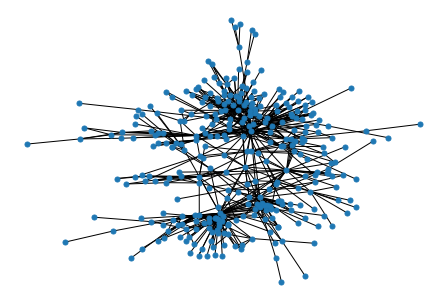

In [14]:
G5=nx.from_pandas_edgelist(book5,'Source', 'Target', edge_attr=True, create_using=nx.Graph())
pos=nx.spring_layout(G5,iterations=20)
nx.draw(G5,pos,node_size=25,with_labels=False)

In [15]:
central_dict_5 = nx.degree_centrality(G5)
central_5 = sorted(central_dict_5.items(), key=operator.itemgetter(1),reverse=True)
central_all_names_5 = [central_5[i][0] for i in range(0,10)]
name = 'Stark'
res_top_5 = [i for i in range(len(central_all_names_5)) if name in central_all_names_5[i][0]]

def num(s):
  if s == []:
    print('В топ-10 нет персонажа из Дома Старков')
  else:
    print('В топ-10 персонаж из Дома Старков занимает ', s[0] + 1)

res_top = [i for i in range(len(central_5)) if name in central_5[i][0]]

print('топ-10 персонажей по значению центральности по степени в пятой книге:\n', ',\n '.join(central_all_names_5))
print('\n')
num(res_top_5)
print('В этом топе персонаж из Дома Старков занимает', res_top[0] + 1, ' место')

топ-10 персонажей по значению центральности по степени в пятой книге:
 Jon-Snow,
 Daenerys-Targaryen,
 Stannis-Baratheon,
 Tyrion-Lannister,
 Theon-Greyjoy,
 Cersei-Lannister,
 Barristan-Selmy,
 Hizdahr-zo-Loraq,
 Asha-Greyjoy,
 Melisandre


В топ-10 нет персонажа из Дома Старков
В этом топе персонаж из Дома Старков занимает 21  место


**8.  Выберите персонажа и постройте график, показывающий как менялась его влиятельность от номера книги. (2 балл)**

In [16]:
G2=nx.from_pandas_edgelist(book2,'Source', 'Target', edge_attr=True, create_using=nx.Graph())
G3=nx.from_pandas_edgelist(book3,'Source', 'Target', edge_attr=True, create_using=nx.Graph())
G4=nx.from_pandas_edgelist(book4,'Source', 'Target', edge_attr=True, create_using=nx.Graph())

In [17]:
def place(pr,name):
  pr_sort = sorted(pr.items(), key=operator.itemgetter(1),reverse=True)
  pr_all_names = [pr_sort[i][0] for i in range(len(pr_sort))]
  return pr_all_names.index(name)+1

в зависимости от PageRank:


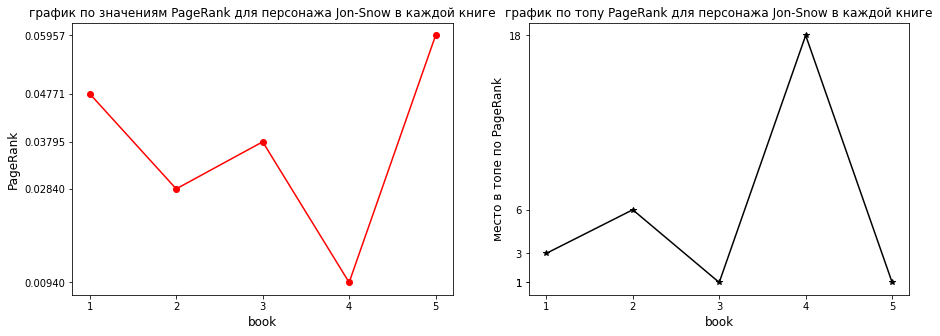

In [18]:
pr1=nx.pagerank(G1, alpha=0.85)
pr2=nx.pagerank(G2, alpha=0.85)
pr3=nx.pagerank(G3, alpha=0.85)
pr4=nx.pagerank(G4, alpha=0.85)
pr5=nx.pagerank(G5, alpha=0.85)

name_8 = 'Jon-Snow'
pageR_DT = [pr1.get(name_8), pr2.get(name_8), pr3.get(name_8), pr4.get(name_8), pr5.get(name_8)]
x = np.arange(1,6)

fig, ax = plt.subplots(nrows=1, sharey=False,ncols=2, figsize=(15, 5))
ax[0].plot(x,pageR_DT,color = 'r', marker = 'o')
ax[0].set_xlabel('book', fontsize=12)
ax[0].set_xticks([1,2,3,4,5])
ax[0].set_yticks(pageR_DT)
ax[0].set_ylabel('PageRank', fontsize=12)
ax[0].set_title('график по значениям PageRank для персонажа ' + str(name_8) + ' в каждой книге', fontsize=12)

y = [place(pr1, name_8),place(pr2, name_8),place(pr3, name_8),place(pr4, name_8),place(pr5, name_8)]

ax[1].plot(x,y,color = 'black', marker = '*')
ax[1].set_xlabel('book', fontsize=12)
ax[1].set_xticks([1,2,3,4,5])
ax[1].set_yticks(y)
ax[1].set_ylabel('место в топе по PageRank', fontsize=12)
ax[1].set_title('график по топу PageRank для персонажа ' + str(name_8) + ' в каждой книге', fontsize=12)

plt.show()

в зависимости от betweenness centrality:

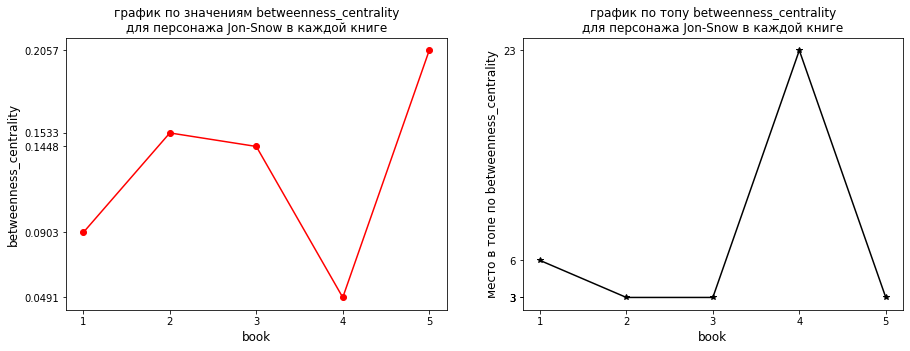

In [19]:
bt1=nx.betweenness_centrality(G1, weight='weight')
bt2=nx.betweenness_centrality(G2, weight='weight')
bt3=nx.betweenness_centrality(G3, weight='weight')
bt4=nx.betweenness_centrality(G4, weight='weight')
bt5=nx.betweenness_centrality(G5, weight='weight')

name_8 = 'Jon-Snow'
bt_8 = [bt1.get(name_8), bt2.get(name_8), bt3.get(name_8), bt4.get(name_8), bt5.get(name_8)]
x = np.arange(1,6)

fig, ax = plt.subplots(nrows=1, sharey=False,ncols=2, figsize=(15, 5))
ax[0].plot(x,bt_8,color = 'r', marker = 'o')
ax[0].set_xlabel('book', fontsize=12)
ax[0].set_xticks([1,2,3,4,5])
ax[0].set_yticks(bt_8)
ax[0].set_ylabel('betweenness_centrality', fontsize=12)
ax[0].set_title('график по значениям betweenness_centrality\n'+'для персонажа ' + str(name_8) + ' в каждой книге')

y = [place(bt1, name_8),place(bt2, name_8),place(bt3, name_8),place(bt4, name_8),place(bt5, name_8)]

ax[1].plot(x,y,color = 'black', marker = '*')
ax[1].set_xlabel('book', fontsize=12)
ax[1].set_xticks([1,2,3,4,5])
ax[1].set_yticks(y)
ax[1].set_ylabel('место в топе по betweenness_centrality', fontsize=12)
ax[1].set_title('график по топу betweenness_centrality\n'+'для персонажа ' + str(name_8) + ' в каждой книге')

plt.show()

по графикам видно некоторое сходство, например, для Jon-Snow

максимум по значениям PageRank и betweenness_centrality с учетом веса ребер достигается в 5 книге

а самую низкую позицию в рейтингах PageRank и betweenness_centrality он занимает в 4 книге


**9. Кто из персонажей самый влиятельный? (2 балла)**
Постройте сеть, объединяющую сети по всем книгам. Постройте таблицу наиболее влиятельных персонажей в зависимости от выбранной метрики.


In [20]:
metrics=['degree centrality','weighted degree','eigenvector centrality',
         'PageRank','closeness centrality','betweenness centrality']



df = pd.DataFrame(columns=['centrality metrics', 'character'], index=list(np.arange(1,len(metrics)+1)))
df['centrality metrics']=metrics

In [21]:
F1 = nx.compose(G1,G2) 
F2 = nx.compose(F1,G3) 
F3 = nx.compose(F2,G4)
F = nx.compose(F3,G5)  

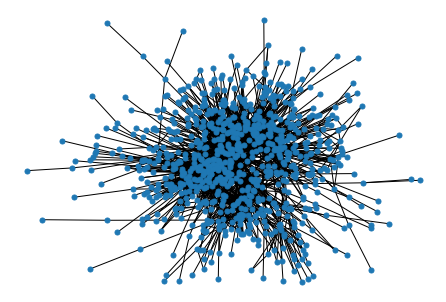

In [22]:
pos=nx.spring_layout(F,iterations=20)
nx.draw(F,pos,node_size=25,with_labels=False)

In [23]:
def centrality_table(G):
    df = pd.DataFrame(columns=['degree_centrality', 'closeness_centrality', 
                           'betweenness_centrality', 'eigenvector_centrality', 'PageRank'],
                      index=list(G.nodes()))
    df['degree_centrality']=list(nx.degree_centrality(G).values())
    df['closeness_centrality']=list(nx.closeness_centrality(G).values())
    df['betweenness_centrality']=list(nx.betweenness_centrality(G).values())
    df['eigenvector_centrality']=list(nx.eigenvector_centrality(G).values())
    df['PageRank']=list(nx.pagerank(G,alpha=0.85).values())
    return df

In [24]:
tabl = centrality_table(F)

In [25]:
degree_centrality_num = tabl.index[tabl['degree_centrality'] == np.max(tabl['degree_centrality'])][0]
closeness_centrality_num = tabl.index[tabl['closeness_centrality'] == np.max(tabl['closeness_centrality'])][0]
betweenness_centrality_num = tabl.index[tabl['betweenness_centrality'] == np.max(tabl['betweenness_centrality'])][0]
eigenvector_centrality_num = tabl.index[tabl['eigenvector_centrality'] == np.max(tabl['eigenvector_centrality'])][0]
PageRank_num = tabl.index[tabl['PageRank'] == np.max(tabl['PageRank'])][0]

перепишем функцию weighted_degree для графа

In [26]:
def weighted_degree_graph(G):
  n_1_with_rep = []
  n_2_with_rep = []
  for i in range(len(list(G.edges(data=True)))):
    n_1_with_rep.append([list(G.edges(data=True))[i][0],list(G.edges(data=True))[i][2]['weight']])
  for i in range(len(list(G.edges(data=True)))):
    n_2_with_rep.append([list(G.edges(data=True))[i][1],list(G.edges(data=True))[i][2]['weight']])

  n_1_without_rep = list(set(n_1_with_rep[i][0] for i in range(len(n_1_with_rep))))
  n_2_without_rep = list(set(n_2_with_rep[i][0] for i in range(len(n_2_with_rep))))
  n_1 = []
  n_2 = []
  for el in n_1_without_rep:
    n_1.append([el, sum([el1[1] for el1 in n_1_with_rep if el1[0] == el])])
  for el in n_2_without_rep:
    n_2.append([el, sum([el1[1] for el1 in n_2_with_rep if el1[0] == el])])

  n=[]
  for i in range(len(n_1)):
    n.append(n_1[i])
  for i in range(len(n_2)):
    n.append(n_2[i])
  q2 = list(set(n[i][0] for i in range(len(n))))
  new_s = []
  for el2 in q2:
    new_s.append([el2, sum([el1[1] for el1 in n if el1[0] == el2])])
  
  arr11 = []
  arr12 = []
  for i in range(len(new_s)):
    arr11.append(new_s[i][0])
    arr12.append(new_s[i][1])
  new_dict = {k: v for k, v in zip(arr11, arr12)}
  return new_dict

In [27]:
def c_table(G):
    df = pd.DataFrame(columns=['weighted_degree'],
                      index=list(weighted_degree_graph(G).keys()))
    df['weighted_degree']=list(weighted_degree_graph(G).values())
    return df

In [28]:
tab1 = c_table(F)

In [29]:
weighted_degree_num = tab1.index[tab1['weighted_degree'] == np.max(tab1['weighted_degree'])][0]

In [30]:
character=[degree_centrality_num,weighted_degree_num,eigenvector_centrality_num,PageRank_num,closeness_centrality_num,betweenness_centrality_num]
df['character']=character

In [31]:
df

,centrality metrics,character
1,degree centrality,Tyrion-Lannister
2,weighted degree,Tyrion-Lannister
3,eigenvector centrality,Tyrion-Lannister
4,PageRank,Jon-Snow
5,closeness centrality,Tyrion-Lannister
6,betweenness centrality,Jon-Snow
